#  <font color="darkred"> &#10070; Algorithme des k plus proches voisins</font>


Le but du notebook est de mettre en oeuvre en Python l'algorithme des k plus proches voisins afin de classer des iris.


## <font color="darkblue"> &diams; Les iris de Fisher</font>

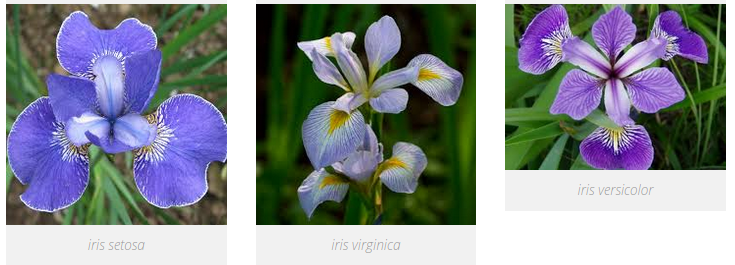

Les [iris de Fisher](https://fr.wikipedia.org/wiki/Iris_de_Fisher) sont "un cas d'école" de l'utilisation de l'algorithme des k plus proches voisins. Sur des iris dont on connait l'espèce (Iris setosa, Iris virginica ou Iris versicolor) on a mesuré (en cm) quatre caractéristiques :
* longueur des sépales
* largeur des sépales
* longueur des pétales
* largeur des pétales

Si vous utilisez ce notebook via Capytale le jeu de données est déjà intégré. Par contre si vous avez téléchargé ce notebook pour une utilisation locale, il faut aussi télécharger le jeu de données [`iris120.csv`](https://fabricenativel.github.io/cpge-info/itc/Notebook/iris120.csv) et l'enregistrer **dans le même répertoire** que ce notebook. Ce fichier comporte les données de 120 iris *déjà classés* dans chacune des trois classes possibles (on rappelle que les $k$ plus proches voisins est un algorithme d'apprentissage *supervisé*).

## <font color="darkblue"> &diams; Lecture des données</font>

## <font color=green> &#9998; Exercices </font>

1. <font color="green"> Ecrire un programme Python qui lit le fichier <code>iris120.csv</code> et crée une liste `donnees_iris` contenant pour chaque iris les caractéristiques et l'espèce dans une liste.</font>

On rappelle qu'il faut suivre les étapes suivantes :
* ouvrir le fichier en donnant son nom (`iris120.csv`) cette étape fournit un *descripteur de fichier* sur lequel s'appliqueront les fonctions suivantes
* lire le contenu du fichier et utiliser `split` afin d'obtenir sur chaque ligne les données d'un iris
* fermer le fichier

In [ ]:
# Votre programme ici


A la fin de cette étape  `donnees_iris[0]` devrait contenir `6.1,2.6,5.6,1.4,virginica`. Comme vous pouvez le constater on doit donc effectuer de nouveau un `split` cette fois avec le caractère `,` de façon à récupérer chacun des champs de données qui sont dans l'ordre :
* longueur des sépales
* largeur des sépales
* longueur des pétales
* largeur des pétales
* classification dans l'une des trois espèces

## <font color=green> &#9998; Exercices </font>

2. <font color="green"> Ecrire un programme Python qui crée la liste <code>iris</code> à partir de <code>donnees_iris</code> en effectuant un `split` sur chaque élément de cette liste.</font>

In [ ]:
# Votre programme ici


A la fin de cette étape, `iris[0]` devrait contenir la liste `['6.1', '2.6', '5.6', '1.4', 'virginica']`.
Remarquez bien que mêmes les données numériques sont représentées par des chaines de caractères. On devra donc **penser à les convertir en flottant** avant de les utiliser

## <font color="darkblue"> &diams; Distance entre deux iris</font>

Afin de déterminer les "voisins plus proches" d'un iris, il faut pouvoir mesurer la distance entre deux iris qui sont représentés par les quatre caractéristiques. On note $(x_1,y_1,z_1,t_1)$ les caractéristiques du premier iris et $(x_2,y_2,z_2,t_2)$ celles du second. On prendra comme distance entre ces eux iris la distance euclidienne dans $\mathbb{R}^4$ :
$$ d = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2+(z_2-z_1)^2+(t_2-t_1)^2} $$

On rappelle que la fonction `sqrt` doit être importé depuis le module `math`

## <font color=green> &#9998; Exercices </font>

3. <font color="green"> Ecrire une fonction <code>distance</code> qui prend en argument deux listes représentant des iris (voir exercice 6) et renvoie la distance entre ces deux iris telle que définie ci-dessus. Attention, penser à convertir car dans les données des iris les valeurs numériques sont des chaines de caractères.</font>

In [ ]:
# Votre fonction distance ici


Tester votre fonction `distance` et vérifier que la distance entre `iris[28]` et `iris[42]` vaut bien environ $4.56$.

In [ ]:
# Test de votre fonction distance


## <font color="darkblue"> &diams; Implémentation de l'algorithme des k plus proches voisins </font>

On veut classer les iris suivants dont on ne connait que les caractéristiques :

<table>
    <tr>
        <th> Fleur </th>
        <th> longueur sépale</th>
        <th> largeur sépale</th>
        <th> longueur pétale</th>
        <th> largeur pétale</th>
    </tr>
    <tr>
        <td> Iris1 </td>
        <td> 4.8 </td>
        <td> 3.7 </td>
        <td> 1.9 </td>
        <td> 0.5 </td>
    </tr>
    <tr>
        <td> Iris2 </td>
        <td> 6.0 </td>
        <td> 2.2 </td>
        <td> 5.4 </td>
        <td> 1.6 </td>
    </tr>
    <tr>
        <td> Iris3 </td>
        <td> 5.5 </td>
        <td> 2.7 </td>
        <td> 4.0 </td>
        <td> 1.2 </td>
    </tr>
</table>

## <font color=green> &#9998; Exercices </font>

4. <font color="green">Définir les variables python `iris1`, `iris2` et `iris3` permettant de représenter ces trois nouveaux iris comme ceux lus à partir du fichier de données.</font>

In [ ]:
# Votre réponse ici


5. <font color="green">Ecrire une fonction `tri_distance` qui prend en argument une liste d'iris <code>iris</code> ainsi qu'un iris à classer <code>nouvel_iris</code> et renvoie la liste  rangée par distance croissante par rapport à <code>nouvel_iris</code>. Pour cela, on pourra utiliser la fonction <code>sorted</code> de Python qui prend en argument une liste ainsi qu'une clé de tri (sous la forme d'une fonction). Notre clé de tri sera donc ici la distance avec <code>nouvel_iris</code>. </font>

In [ ]:
# Votre réponse ici


6. <font color="green">Ecrire une fonction <code>knn</code> qui prend en argument une liste d'iris ainsi qu'un entier <code>k</code> et un iris à classer <code>nouvel_iris</code> et renvoie la classe majoritaire des <code>k</code> plus proches voisins de cet iris. On pourra représenter le nombre d'éléments de chaque classe par un dictionnaire (la clé est l'espèce, la valeur le nombre de fois où cette espèce apparait parmi les $k$ plus proches voisins)</font>

In [ ]:
# Votre programme ici (ou à écrire dans VS-Code)


7. <font color="green">Tester votre fonction sur chacun des trois iris de la question 4.</font>

In [ ]:
# Vos résultats ici


## <font color="darkblue"> &diams; Construction de la matrice de confusion </font>


Le but de cette partie est de construire la matrice de confusion pour $k=5$ pour des données *déjà classées* disponibles dans le fichier `iris30.csv`. Ce fichier est déjà intégré dans ce notebook (utilisation depuis capytale) ou sinon téléchargeable [ici](https://fabricenativel.github.io/cpge-info/itc/Notebook/iris30.csv). 
Un jeu de données est souvent réparties de la sorte entre un jeu permettant l'apprentissage supervisé (le fichier (`iris120.csv` dans cet exemple) et un jeu permettant de tester l'algorithme (`iris30.csv` dans notre exemple)

8. <font color="green">Créer une liste <code>iris_test</code> content les 30 iris déjà classés (on pourra reprendre ce qui a été fait pour créer la liste des 120 iris)</font>

In [ ]:
# Votre réponse ici


On décide de représentrer la matrice de confusion *par un dictionnaire* dont les clés sont les couples de classe `(C1,C2)` (par exemple `('setosa','virginica')`) et les valeurs le nombre d'iris de la classe `C1` classé comme appartenant à la classe `C2`.

9. <font color="green">Créer ce dictionnaire en initialisant toutes les valeurs à 0</font>

In [ ]:
# Votre réponse ici


10. <font color="green">Parcourir la liste <code>iris_test</code> et classer chaque iris rencontré avec la fonction <code>knn</code> écrite à la partie précédente. Modifier en conséquence le dictionnaire représentant la matrice de confusion.</font>

In [ ]:
# Votre réponse ici


11. <font color="green">Afficher la matrice de confusion et déterminer le pourcentage d'erreur commis pour l'algorithme des $k$ plus proches voisins dans ce cas.</font>

In [ ]:
# Votre réponse ici


## <font color="darkblue"> &diams; Pour aller plus loin </font>


On peut tester l'algorithme en modifiant les valeurs de $k$ ou encore en changeant de distance et tester l'impact de ces modifications sur l'efficatité de l'algorithme d des $k$ plus proches voisins

[La page wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins) sur la méthode des k plus proches voisins. 